In [1]:
run ./RNA_simulation.py

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%load_ext rpy2.ipython

## Figure S1

In [3]:
path = './stats/multi_hit/bp_12/'
stat_m = {}
count = 0
for filename in os.listdir(path):
    name = path + filename
    if os.path.getsize(name) > 0:
        file = open(name, 'r')
        run = pickle.load(file)
        stat_m[count] = run
        file.close()
        count += 1

### Multi-hit introgressions

In [5]:
single_m = []
for i in stat_m.values():
    a = np.array([len(j) for j in i['single']])
    b = np.array([len(j) for j in i['single_inv']])
    single_m.append((a + b)/2.)
single_m = pd.DataFrame(single_m)

double_m = []
for i in stat_m.values():
    a = np.array([len(j) for j in i['double']])
    b = np.array([len(j) for j in i['double_inv']])
    double_m.append((a + b)/2.)
double_m = pd.DataFrame(double_m)

triple_m = []
for i in stat_m.values():
    a = np.array([len(j) for j in i['triple']])
    b = np.array([len(j) for j in i['triple_inv']])
    triple_m.append((a + b)/2.)
triple_m = pd.DataFrame(triple_m)

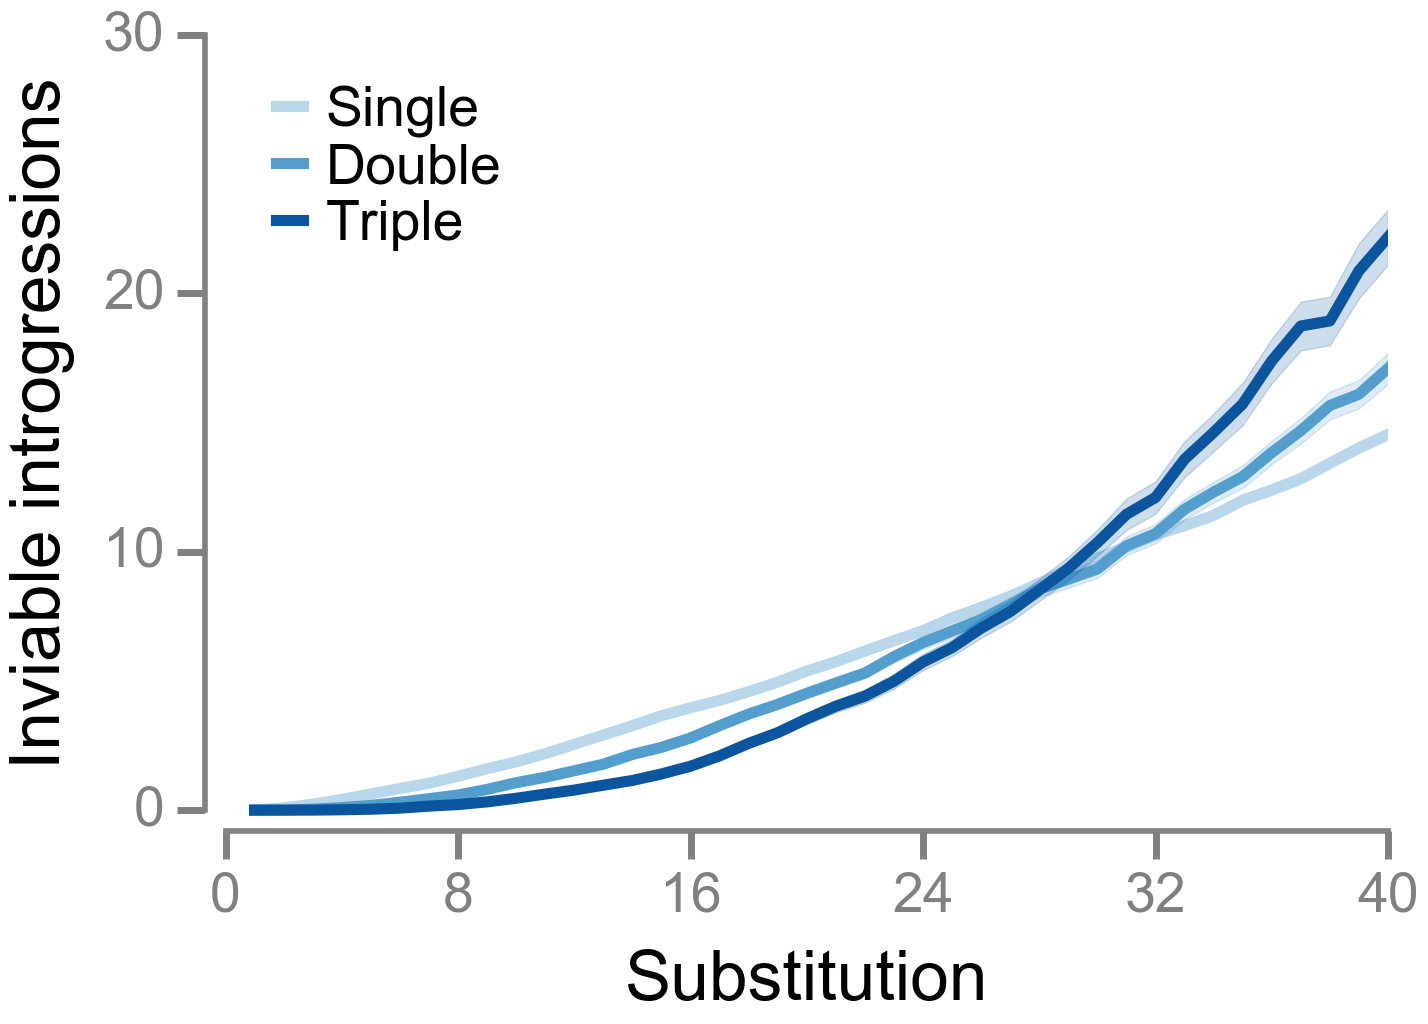

In [6]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

col=(0.73094965079251462, 0.83947713375091548, 0.92132257293252384)
err0=1.96* single_m.std()/np.sqrt(len(single_m))
plt.errorbar(x, single_m.mean(), linewidth=8, clip_on=False, color=col, zorder=2, label=r'Single')
ax.fill_between(x, single_m.mean() - err0, single_m.mean() + err0, alpha=.2, zorder=2, color=col)

col=(0.32628989885835086, 0.61862362903707169, 0.80279893524506507)
err1=1.96* double_m.std()/np.sqrt(len(double_m))
plt.errorbar(x, double_m.mean(), linewidth=8, clip_on=False, color= col, zorder=3, label=r'Double')
ax.fill_between(x, double_m.mean() - err1, double_m.mean() + err1, alpha=.2, zorder=3, color=col)

col=(0.044059979477349451, 0.33388697645243476, 0.62445215617909156)
err2=1.96* triple_m.std()/np.sqrt(len(triple_m))
plt.errorbar(x, triple_m.mean(), linewidth=8, clip_on=False, color=col, zorder=4, label=r'Triple')
ax.fill_between(x, triple_m.mean() - err2, triple_m.mean() + err2, alpha=.2, zorder=4, color=col)

plt.tick_params(axis='x', which='both', bottom='on', top='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Inviable introgressions', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0, 30, 4))
plt.xticks(np.linspace(0, 40, 6))

ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
#handles = [h[0] for h in handles]
ax.legend(handles,labels, loc='upper left', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=0.3)


rect = patches.Rectangle((40,1),1,24,linewidth=1,edgecolor='none',facecolor='white', zorder=5, clip_on=False)
# Add the patch to the Axes
ax.add_patch(rect)
plt.show()

## Figure S2

In [13]:
path = './stats/bp_12/'
stat_12 = {}
count = 0
for filename in os.listdir(path):
    name = path + filename
    if os.path.getsize(name) > 0:
        file = open(name, 'r')
        run = pickle.load(file)
        stat_12[count] = run
        file.close()
        count += 1

In [8]:
p_est = []
for i in stat_12.values():
    p_est.append(i['p_est'])
p_est = pd.DataFrame(p_est)

In [9]:
x = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40])
y = np.array(p_est.mean())

In [10]:
%%R -i x -i y
lin = lm(y ~ x)
summary(lin)


Call:
lm(formula = y ~ x)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0009388 -0.0002776  0.0001189  0.0003220  0.0008483 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.828e-02  4.016e-04  45.512 6.46e-10 ***
x           -6.796e-05  1.687e-05  -4.028  0.00501 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0006534 on 7 degrees of freedom
Multiple R-squared:  0.6986,	Adjusted R-squared:  0.6555 
F-statistic: 16.22 on 1 and 7 DF,  p-value: 0.005009



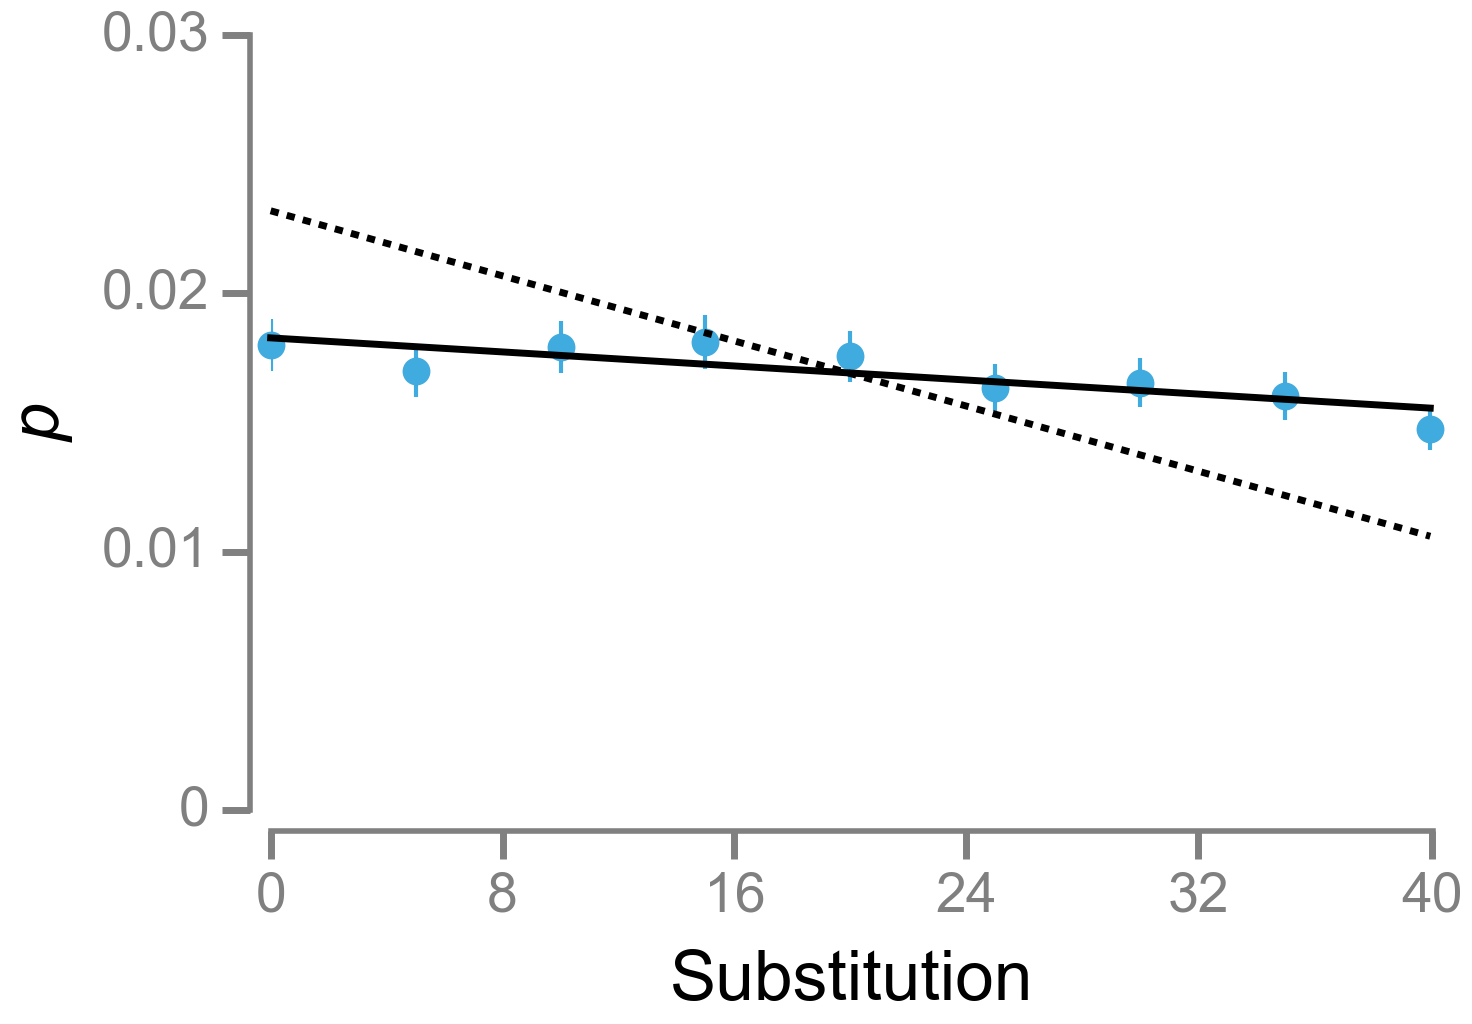

In [12]:
x = [0, 5, 10, 15, 20, 25, 30, 35, 40]
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

err0= 1.96*p_est.std()/np.sqrt(len(p_est))
plt.errorbar(x, p_est.mean(), yerr=err0,fmt='o', linewidth=3, capsize=0, zorder=1, markersize=20, clip_on=False, ms=20, mew=0.01, elinewidth=3, color='#40ABDF', ecolor='#40ABDF')

plt.errorbar(x, [-6.796e-05*i + 1.828e-02 for i in x], linewidth=5, clip_on=False, color='black', zorder=2)

plt.errorbar(x, [-0.000315 * i + 0.0232 for i in x], ls='--',linewidth=5, clip_on=False, color='black', zorder=3)
#plt.errorbar(x, p_est.mean(), linewidth=10, clip_on=False, color='#40ABDF', zorder=1)
#ax.fill_between(x, p_est.mean() - err0, p_est.mean() + err0, alpha=.2, color='#40ABDF', zorder=1)


plt.tick_params(axis='x', which='both', bottom='on', top='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'p', fontsize= 50, labelpad=20, style='italic')
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0, 0.03, 4), [ 0,  0.01,  0.02,  0.03])
#plt.yticks(np.linspace(0, 1, 6), [ 0 ,  0.2,  0.4,  0.6,  0.8,  1 ])
plt.xticks([  0.,   8.,  16.,  24.,  32.,  40.06], [  0,   8,  16,  24,  32,  40])
plt.ylim(0)
plt.xlim(0, 40.1)
rect = patches.Rectangle((40,0.05),1,0.4,linewidth=1,edgecolor='none',facecolor='white', zorder=5, clip_on=False)
# Add the patch to the Axes
#ax.add_patch(rect)
plt.show()

## Figure S3

In [13]:
data = pd.read_csv('Dataset', )
del data['Unnamed: 0']
data.head()

,ref bp,holeyness,final_single,final_double,final_triple
0,29,0.503231,9.0,24.0,35.5
1,25,0.739809,22.5,6.5,8.5
2,24,0.611972,15.0,9.0,24.5
3,19,0.536040,12.0,13.5,8.0
4,29,0.590969,12.0,11.0,31.0


In [14]:
import seaborn as sns

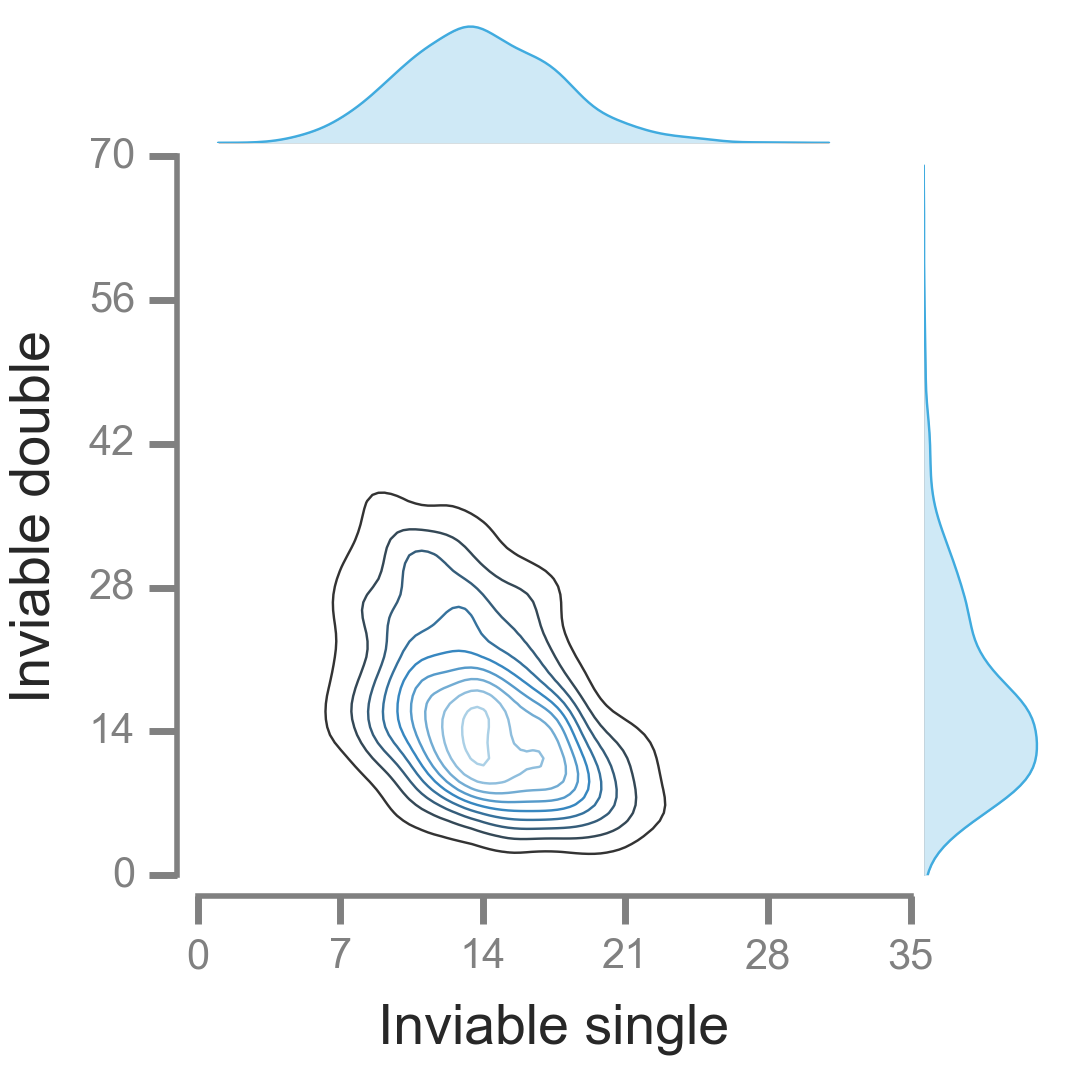

In [15]:
sns.set_context("notebook", font_scale=3)
sns.set_style("ticks", {'axes.linewidth': 4, 'axes.edgecolor': 'grey', 'xtick.major.size': 20, \
                        'ytick.color': 'grey', 'ytick.major.size': 20, 'xtick.color': 'grey'})
#tmp = data[data['alpha']==12]
g = sns.JointGrid(x=data['final_single'], y=data['final_double'], size=11, space=0.1, xlim=(0, 35), ylim=(0, 70))#, ratio=1)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, color='#40ABDF', shade=True)
g.ax_joint.set_xticks(np.linspace(0, 35, 6))
g.ax_joint.set_yticks(np.linspace(0, 70, 6))
g.ax_joint.set_xlabel('Inviable single', fontdict={'size': 40}, labelpad=20)
g.ax_joint.set_ylabel('Inviable double', fontdict={'size': 40}, labelpad=20)#, style='italic')
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()
g.ax_joint.tick_params(width=5, pad=10)
g.ax_joint.spines['left'].set_position(('outward', 15))
g.ax_joint.spines['bottom'].set_position(('outward', 15))

## Figure S4

In [5]:
from math import sqrt
from scipy.stats import t

In [17]:
try:
    del data
except NameError:
    pass
for alpha in [4, 8, 12, 16, 20]:
    tmp = pd.read_csv("holeyness_alpha_" + str(alpha))
    tmp['alpha'] = alpha
    try:
        data = pd.concat([data, tmp])
    except NameError:
        data = tmp
del data['Unnamed: 0']
data.head()

,BP_ref,holeyness,alpha
0,20,0.643703,4
1,27,0.706545,4
2,28,0.604847,4
3,27,0.613380,4
4,29,0.639602,4


In [19]:
gdata = data.groupby('alpha')
m = gdata.mean()
ci = gdata.std() / sqrt(1000) * t.ppf(.975, 999)

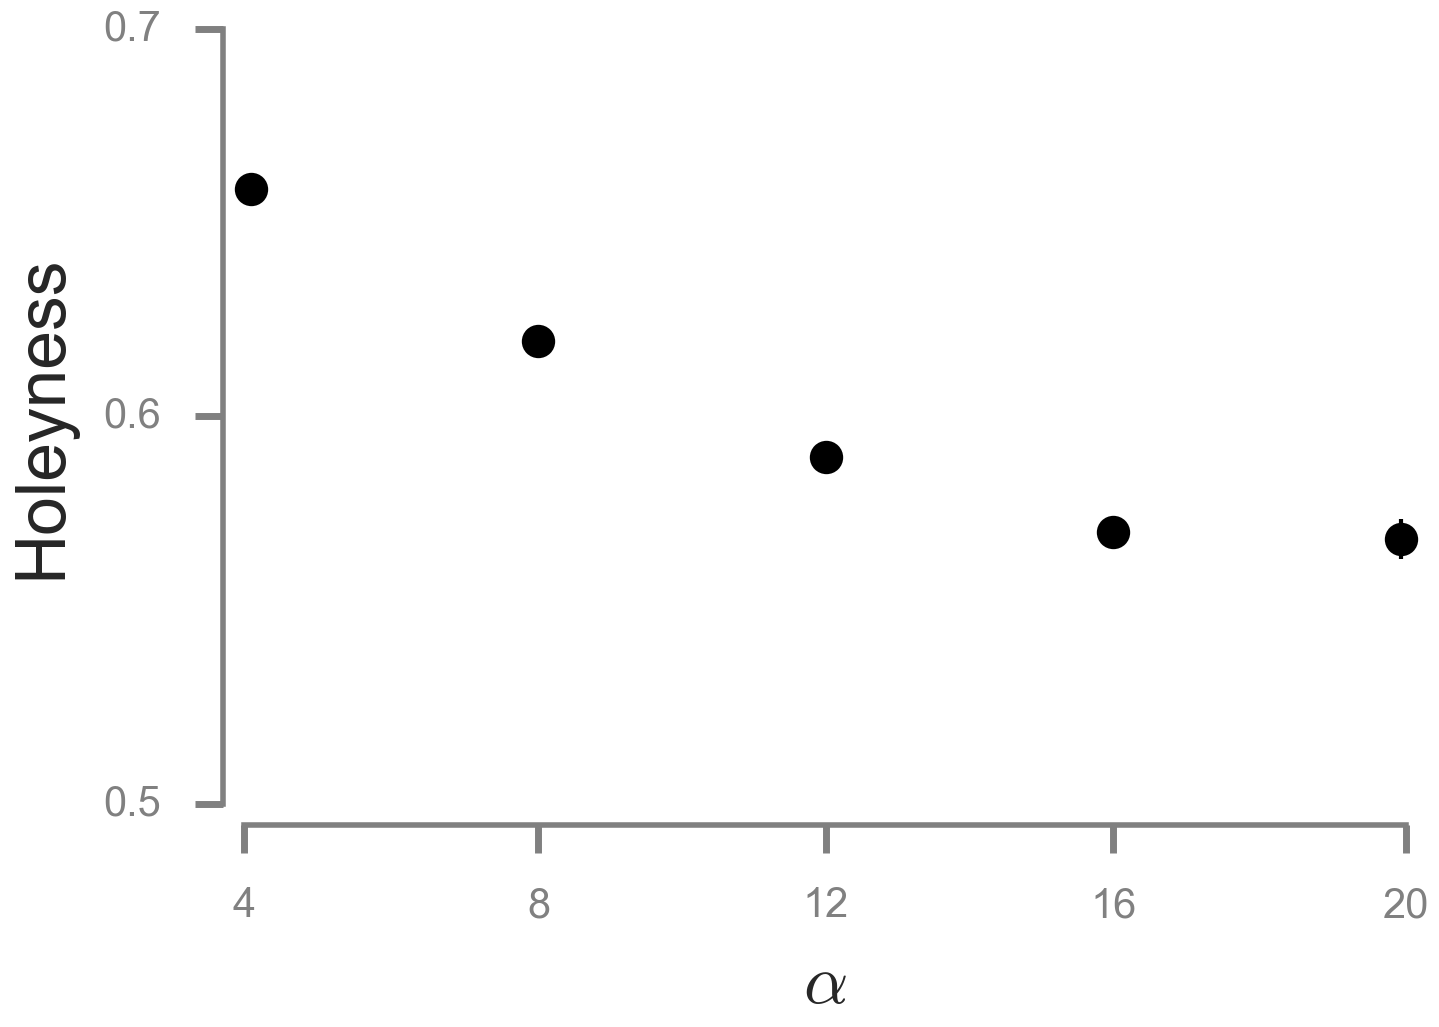

In [20]:
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))
plt.errorbar(m.index.tolist(), m['holeyness'].tolist(), yerr=ci['holeyness'].tolist(), fmt='o', linewidth=3, capsize=0, markersize=24, clip_on=False, ms=15, mew=0.01, elinewidth=3, color='black', ecolor='black')
plt.tick_params(axis='x', which='both', bottom='on', top='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Holeyness', fontsize= 50, labelpad=20)
plt.xlabel(r'$\alpha$', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0.5, 0.7, 3))#, [0, 0.5, 1])
plt.xticks([3.9, 8, 12, 16, 20.08], [4, 8, 12, 16, 20])
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
ax.legend(handles, labels, loc=(0,0), fontsize='large', framealpha=0, numpoints=1, markerscale=1, handletextpad=-0.4)
plt.show()

In [29]:
try:
    del data
except NameError:
    pass
for alpha in [4, 8, 12, 16, 20]:
    tmp = pd.read_csv("holeyness_alpha_" + str(alpha))
    tmp['alpha'] = alpha
    try:
        data = pd.concat([data, tmp])
    except NameError:
        data = tmp
del data['Unnamed: 0']
data.head()

,BP_ref,holeyness,alpha
0,20,0.643703,4
1,27,0.706545,4
2,28,0.604847,4
3,27,0.613380,4
4,29,0.639602,4


In [30]:
gdata = data.groupby('alpha')
m = gdata.mean()
ci = gdata.std() / sqrt(1000) * t.ppf(.975, 999)

In [31]:
data['bp_groups'] = data['BP_ref']
data['bp_groups'][data['BP_ref'] < 21] = 10
data['bp_groups'][data['BP_ref'] > 33] = 50
n = data['bp_groups'].value_counts()
n

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


27    552
28    546
29    538
26    518
30    455
25    450
31    338
24    320
23    271
32    243
22    186
21    163
10    162
33    133
50    125
Name: bp_groups, dtype: int64

In [32]:
fdata = data.groupby('bp_groups')
m2 = fdata.mean()
m2['n'] = 0
for i in n.index.tolist():
    m2.loc[m2.index==i, 'n'] = n[i]
m2

,BP_ref,holeyness,alpha,n
bp_groups,,,,
10,18.635802,0.579380,10.024691,162
21,21.000000,0.585898,11.730061,163
22,22.000000,0.581340,12.516129,186
23,23.000000,0.596112,11.542435,271
24,24.000000,0.594543,11.975000,320
25,25.000000,0.599175,12.186667,450
26,26.000000,0.593749,12.447876,518
27,27.000000,0.595539,12.137681,552
28,28.000000,0.607539,12.007326,546


In [33]:
s2 = fdata.std()
s2['sqrt_n'] = np.sqrt(m2['n']) 
s2['t_quant'] = t.ppf(.975, m2['n'] - 1) 
s2

,BP_ref,holeyness,alpha,sqrt_n,t_quant
bp_groups,,,,,
10,1.722183,0.076977,4.396428,12.727922,1.974808
21,0.000000,0.073460,5.676529,12.767145,1.974716
22,0.000000,0.079168,5.917656,13.638182,1.972870
23,0.000000,0.069208,5.622462,16.462078,1.968789
24,0.000000,0.072273,5.558410,17.888544,1.967428
25,0.000000,0.072123,5.682059,21.213203,1.965261
26,0.000000,0.071456,5.432208,22.759613,1.964563
27,0.000000,0.073804,5.611360,23.494680,1.964279
28,0.000000,0.071651,5.838180,23.366643,1.964326


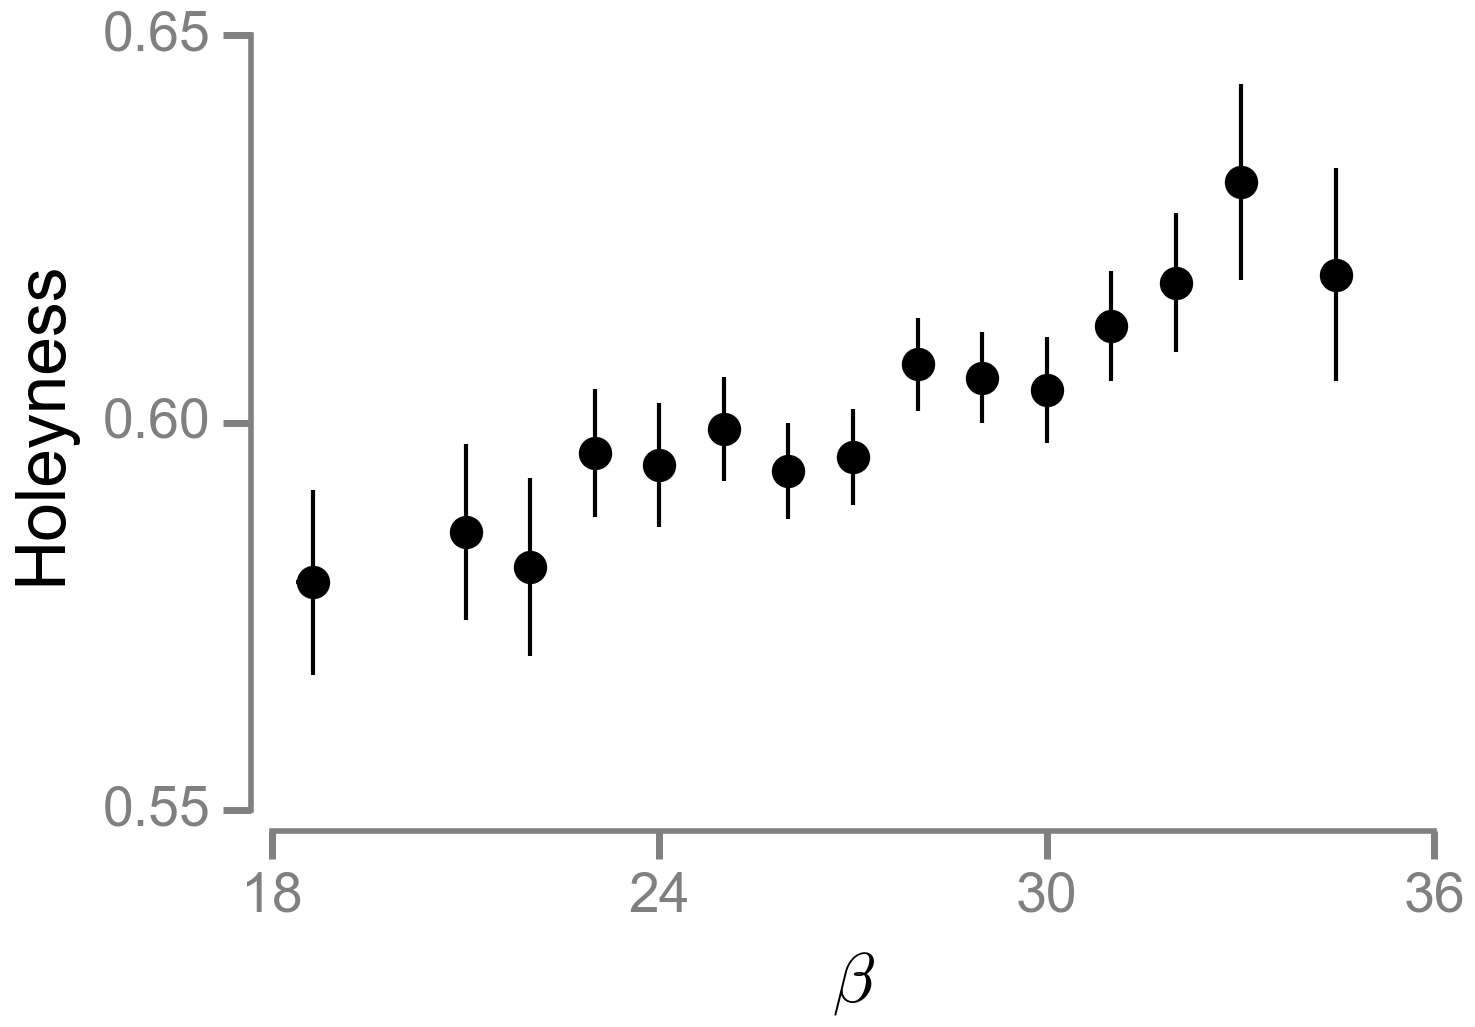

In [36]:
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))
plt.errorbar(m2['BP_ref'].tolist(), m2['holeyness'].tolist(), xerr=(s2['BP_ref'] / s2['sqrt_n'] * s2['t_quant']).tolist(),yerr=(s2['holeyness'] / s2['sqrt_n'] * s2['t_quant']).tolist(), fmt='o', linewidth=3, capsize=0, markersize=24, clip_on=False, ms=20, mew=0.01, elinewidth=3, color='black', ecolor='black')
plt.tick_params(axis='x', which='both', bottom='on', top='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Holeyness', fontsize= 50, labelpad=20)
plt.xlabel(r'$\beta$', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0.55, 0.65, 3))#, [0, 0.5, 1])
plt.xticks(np.linspace(18, 36, 4))
plt.show()

## Figure S5

In [3]:
path = './stats/bp_4/'
stat_4 = {}
count = 0
for filename in os.listdir(path):
    name = path + filename
    if os.path.getsize(name) > 0:
        file = open(name, 'r')
        run = pickle.load(file)
        stat_4[count] = run
        file.close()
        count += 1

In [4]:
path = './stats/bp_8/'
stat_8 = {}
count = 0
for filename in os.listdir(path):
    name = path + filename
    if os.path.getsize(name) > 0:
        file = open(name, 'r')
        run = pickle.load(file)
        stat_8[count] = run
        file.close()
        count += 1

In [6]:
path = './stats/bp_16/'
stat_16 = {}
count = 0
for filename in os.listdir(path):
    name = path + filename
    if os.path.getsize(name) > 0:
        file = open(name, 'r')
        run = pickle.load(file)
        stat_16[count] = run
        file.close()
        count += 1

In [7]:
path = './stats/bp_20/'
stat_20 = {}
count = 0
for filename in os.listdir(path):
    name = path + filename
    if os.path.getsize(name) > 0:
        file = open(name, 'r')
        run = pickle.load(file)
        stat_20[count] = run
        file.close()
        count += 1

# Single, double, and triple introgressions

In [18]:
single_4 = []
for i in stat_4.values():
    a = np.array([len(j) for j in i['single']])
    b = np.array([len(j) for j in i['single_inv']])
    single_4.append((a + b)/2.)
single_4 = pd.DataFrame(single_4)

double_4 = []
for i in stat_4.values():
    a = np.array([len(j) for j in i['double']])
    b = np.array([len(j) for j in i['double_inv']])
    double_4.append((a + b)/2.)
double_4 = pd.DataFrame(double_4)

triple_4 = []
for i in stat_4.values():
    a = np.array([len(j) for j in i['triple']])
    b = np.array([len(j) for j in i['triple_inv']])
    triple_4.append((a + b)/2.)
triple_4 = pd.DataFrame(triple_4)

single_8 = []
for i in stat_8.values():
    a = np.array([len(j) for j in i['single']])
    b = np.array([len(j) for j in i['single_inv']])
    single_8.append((a + b)/2.)
single_8 = pd.DataFrame(single_8)

double_8 = []
for i in stat_8.values():
    a = np.array([len(j) for j in i['double']])
    b = np.array([len(j) for j in i['double_inv']])
    double_8.append((a + b)/2.)
double_8 = pd.DataFrame(double_8)

triple_8 = []
for i in stat_8.values():
    a = np.array([len(j) for j in i['triple']])
    b = np.array([len(j) for j in i['triple_inv']])
    triple_8.append((a + b)/2.)
triple_8 = pd.DataFrame(triple_8)

single_16 = []
for i in stat_16.values():
    a = np.array([len(j) for j in i['single']])
    b = np.array([len(j) for j in i['single_inv']])
    single_16.append((a + b)/2.)
single_16 = pd.DataFrame(single_16)

double_16 = []
for i in stat_16.values():
    a = np.array([len(j) for j in i['double']])
    b = np.array([len(j) for j in i['double_inv']])
    double_16.append((a + b)/2.)
double_16 = pd.DataFrame(double_16)

triple_16 = []
for i in stat_16.values():
    a = np.array([len(j) for j in i['triple']])
    b = np.array([len(j) for j in i['triple_inv']])
    triple_16.append((a + b)/2.)
triple_16 = pd.DataFrame(triple_16)

single_20 = []
for i in stat_20.values():
    a = np.array([len(j) for j in i['single']])
    b = np.array([len(j) for j in i['single_inv']])
    single_20.append((a + b)/2.)
single_20 = pd.DataFrame(single_20)

double_20 = []
for i in stat_20.values():
    a = np.array([len(j) for j in i['double']])
    b = np.array([len(j) for j in i['double_inv']])
    double_20.append((a + b)/2.)
double_20 = pd.DataFrame(double_20)

triple_20 = []
for i in stat_20.values():
    a = np.array([len(j) for j in i['triple']])
    b = np.array([len(j) for j in i['triple_inv']])
    triple_20.append((a + b)/2.)
triple_20 = pd.DataFrame(triple_20)

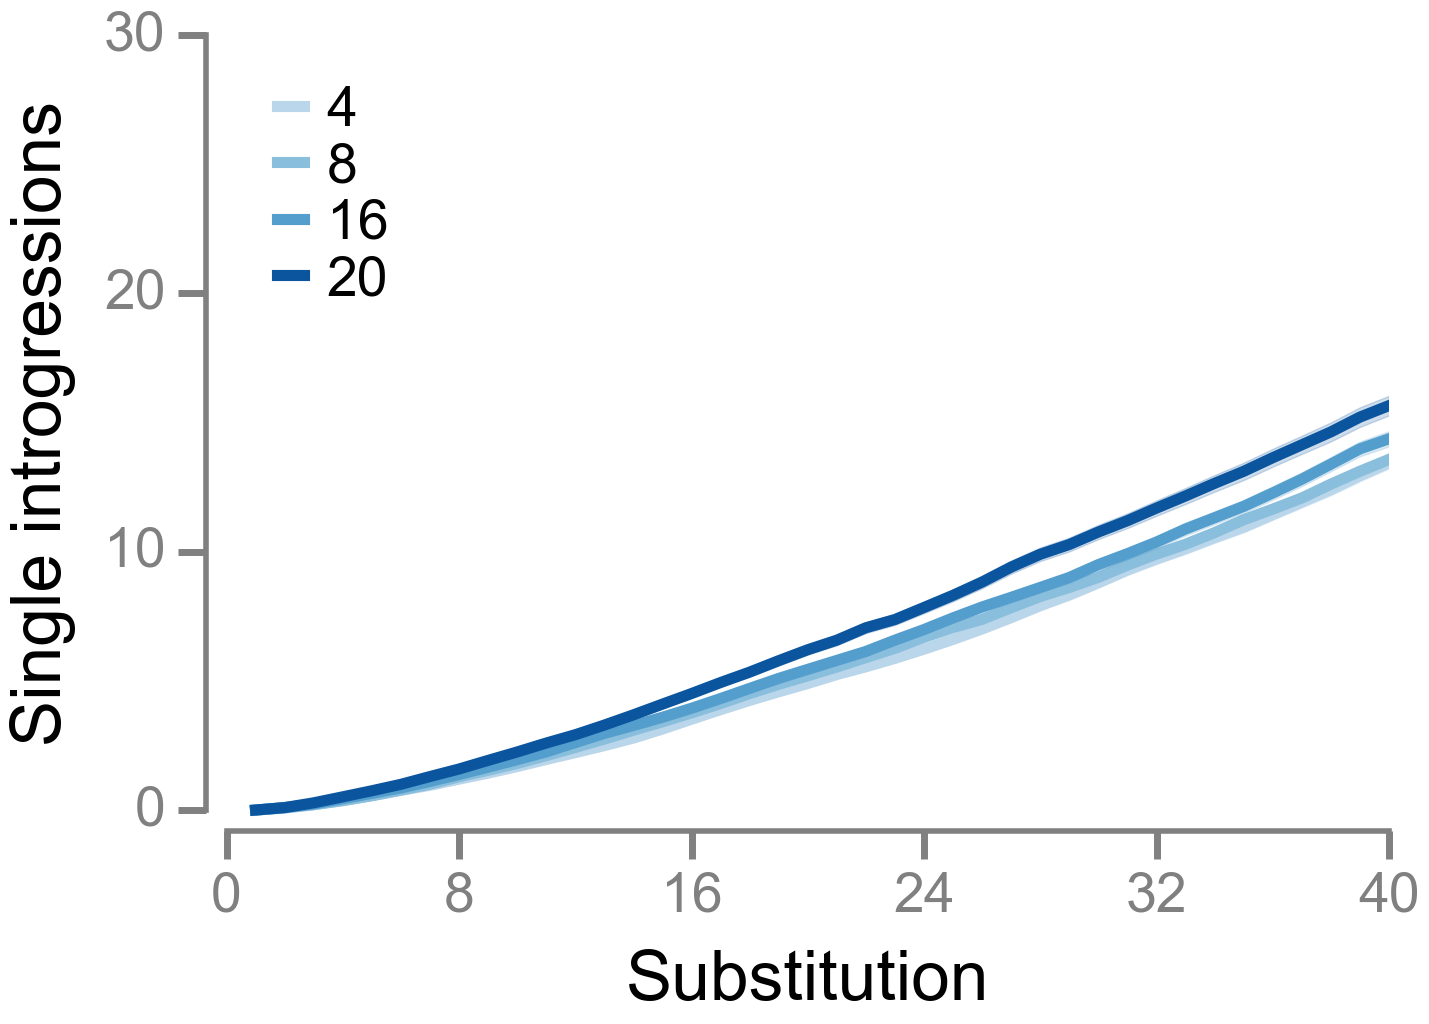

In [31]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

col = (0.73094965079251462, 0.83947713375091548, 0.92132257293252384)
err0=1.96* single_4.std()/np.sqrt(len(single_4))
plt.errorbar(x, single_4.mean(), linewidth=8, clip_on=False, color=col, zorder=2, label=r'4')
ax.fill_between(x, single_4.mean() - err0, single_4.mean() + err0, alpha=.2, zorder=1, color=col)

col=(0.53568628967977039, 0.7460822911823497, 0.86425221877939562)
err0=1.96* single_8.std()/np.sqrt(len(single_8))
plt.errorbar(x, single_8.mean(), linewidth=8, clip_on=False, color=col, zorder=2, label=r'8')
ax.fill_between(x, single_8.mean() - err0, single_8.mean() + err0, alpha=.2, zorder=2, color=col)

col=(0.32628989885835086, 0.61862362903707169, 0.80279893524506507)
err0=1.96* single_16.std()/np.sqrt(len(single_16))
plt.errorbar(x, single_16.mean(), linewidth=8, clip_on=False, color=col, zorder=3, label=r'16')
ax.fill_between(x, single_16.mean() - err0, single_16.mean() + err0, alpha=.2, zorder=3, color=col)

col=(0.044059979477349451, 0.33388697645243476, 0.62445215617909156)
err0=1.96* single_20.std()/np.sqrt(len(single_20))
plt.errorbar(x, single_20.mean(), linewidth=8, clip_on=False, color=col, zorder=4, label=r'20')
ax.fill_between(x, single_20.mean() - err0, single_20.mean() + err0, alpha=.2, zorder=4, color=col)

plt.tick_params(axis='x', which='both', bottom='on', top='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Single introgressions', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0, 30, 4))
plt.xticks(np.linspace(0, 40, 6))

ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
#handles = [h[0] for h in handles]
ax.legend(handles,labels, loc='upper left', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=0.3)


rect = patches.Rectangle((40,1),1,24,linewidth=1,edgecolor='none',facecolor='white', zorder=5, clip_on=False)
# Add the patch to the Axes
ax.add_patch(rect)
#plt.show()
plt.savefig('/Users/Amfortas/Desktop/Figs_Jan14/single_alpha.png', bbox_inches='tight', dpi=300)

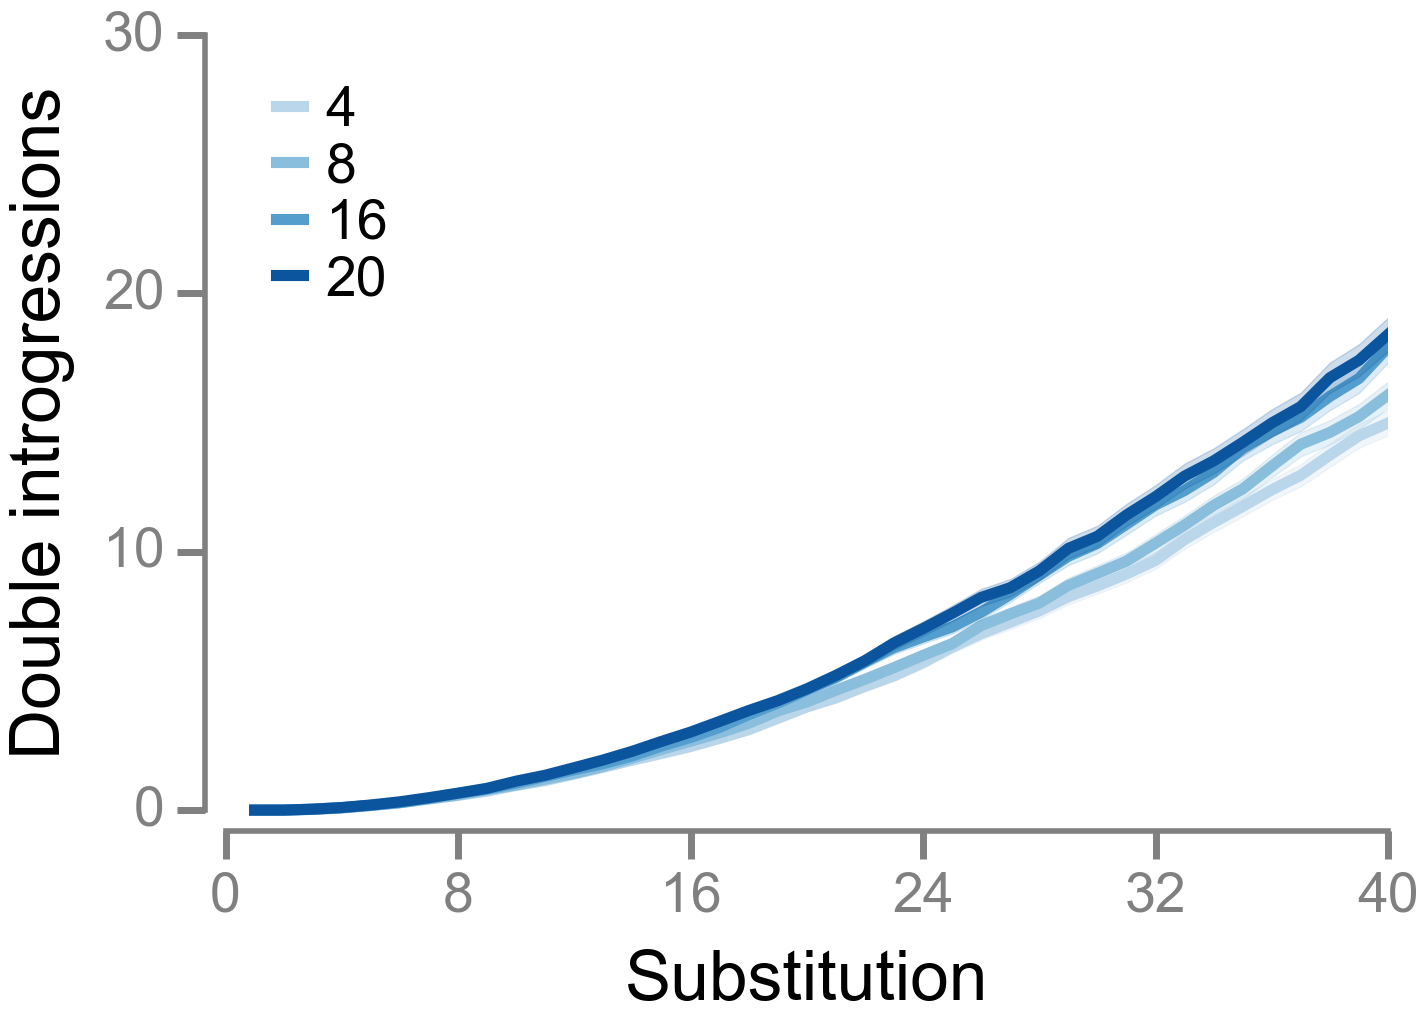

In [32]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

col = (0.73094965079251462, 0.83947713375091548, 0.92132257293252384)
err0=1.96* double_4.std()/np.sqrt(len(double_4))
plt.errorbar(x, double_4.mean(), linewidth=8, clip_on=False, color=col, zorder=2, label=r'4')
ax.fill_between(x, double_4.mean() - err0, double_4.mean() + err0, alpha=.2, zorder=1, color=col)

col=(0.53568628967977039, 0.7460822911823497, 0.86425221877939562)
err0=1.96* double_8.std()/np.sqrt(len(double_8))
plt.errorbar(x, double_8.mean(), linewidth=8, clip_on=False, color=col, zorder=2, label=r'8')
ax.fill_between(x, double_8.mean() - err0, double_8.mean() + err0, alpha=.2, zorder=2, color=col)

col=(0.32628989885835086, 0.61862362903707169, 0.80279893524506507)
err0=1.96* double_16.std()/np.sqrt(len(double_16))
plt.errorbar(x, double_16.mean(), linewidth=8, clip_on=False, color=col, zorder=3, label=r'16')
ax.fill_between(x, double_16.mean() - err0, double_16.mean() + err0, alpha=.2, zorder=3, color=col)

col=(0.044059979477349451, 0.33388697645243476, 0.62445215617909156)
err0=1.96* double_20.std()/np.sqrt(len(double_20))
plt.errorbar(x, double_20.mean(), linewidth=8, clip_on=False, color=col, zorder=4, label=r'20')
ax.fill_between(x, double_20.mean() - err0, double_20.mean() + err0, alpha=.2, zorder=4, color=col)

plt.tick_params(axis='x', which='both', bottom='on', top='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Double introgressions', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0, 30, 4))
plt.xticks(np.linspace(0, 40, 6))

ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
#handles = [h[0] for h in handles]
ax.legend(handles,labels, loc='upper left', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=0.3)


rect = patches.Rectangle((40,1),1,24,linewidth=1,edgecolor='none',facecolor='white', zorder=5, clip_on=False)
# Add the patch to the Axes
ax.add_patch(rect)
plt.ylim(0)
#plt.show()
plt.savefig('/Users/Amfortas/Desktop/Figs_Jan14/double_alpha.png', bbox_inches='tight', dpi=300)

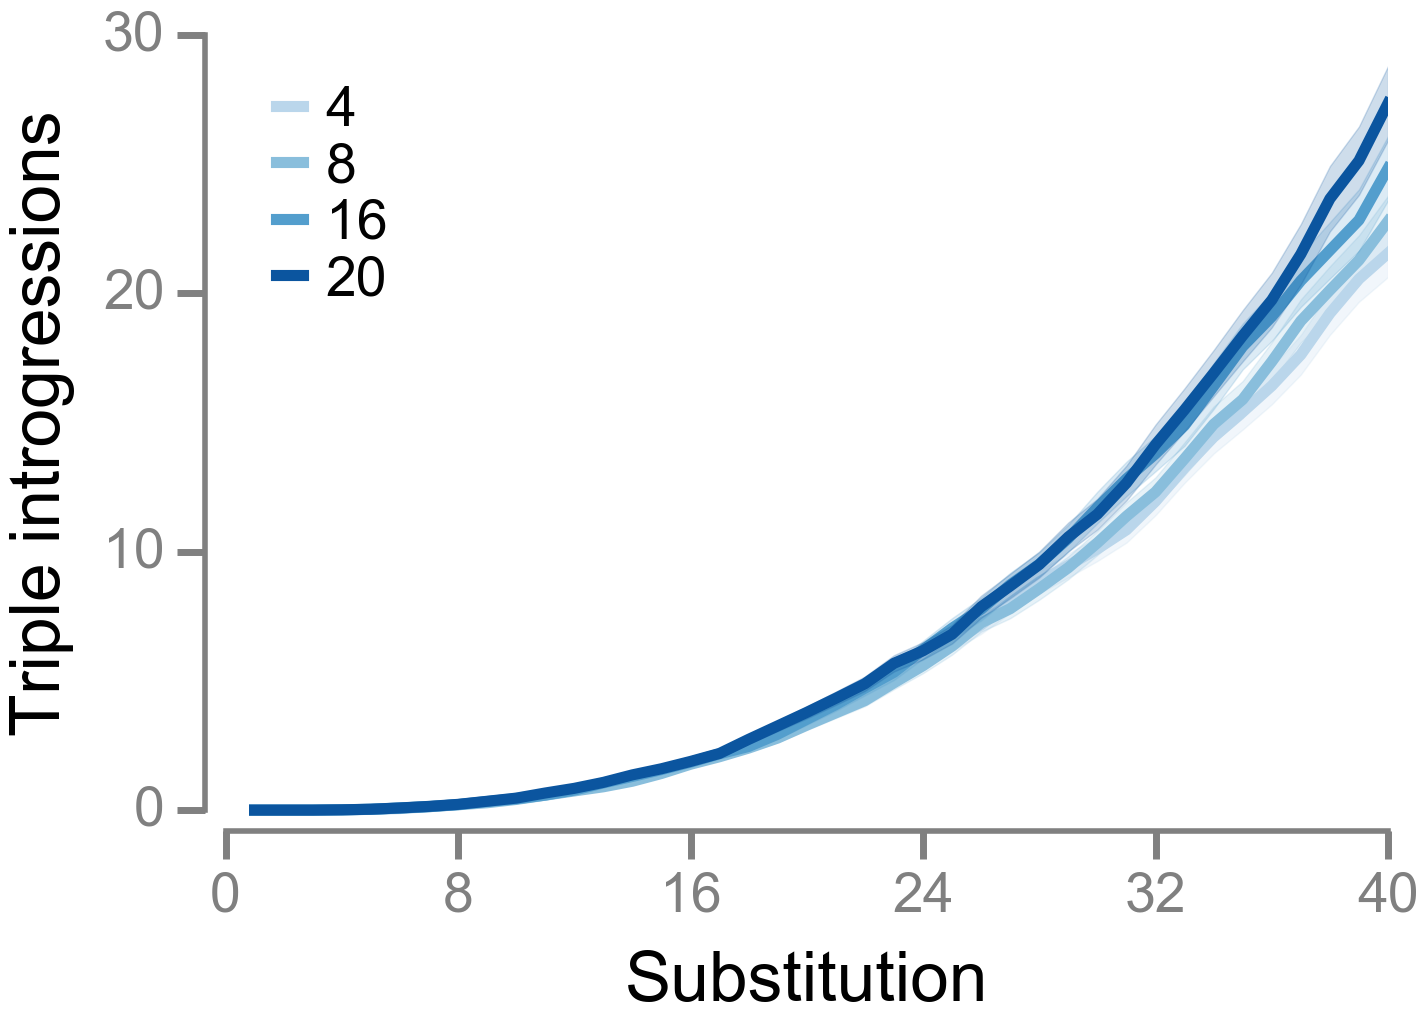

In [33]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

col = (0.73094965079251462, 0.83947713375091548, 0.92132257293252384)
err0=1.96* triple_4.std()/np.sqrt(len(triple_4))
plt.errorbar(x, triple_4.mean(), linewidth=8, clip_on=False, color=col, zorder=2, label=r'4')
ax.fill_between(x, triple_4.mean() - err0, triple_4.mean() + err0, alpha=.2, zorder=1, color=col)

col=(0.53568628967977039, 0.7460822911823497, 0.86425221877939562)
err0=1.96* triple_8.std()/np.sqrt(len(triple_8))
plt.errorbar(x, triple_8.mean(), linewidth=8, clip_on=False, color=col, zorder=2, label=r'8')
ax.fill_between(x, triple_8.mean() - err0, triple_8.mean() + err0, alpha=.2, zorder=2, color=col)

col=(0.32628989885835086, 0.61862362903707169, 0.80279893524506507)
err0=1.96* triple_16.std()/np.sqrt(len(triple_16))
plt.errorbar(x, triple_16.mean(), linewidth=8, clip_on=False, color=col, zorder=3, label=r'16')
ax.fill_between(x, triple_16.mean() - err0, triple_16.mean() + err0, alpha=.2, zorder=3, color=col)

col=(0.044059979477349451, 0.33388697645243476, 0.62445215617909156)
err0=1.96* triple_20.std()/np.sqrt(len(triple_20))
plt.errorbar(x, triple_20.mean(), linewidth=8, clip_on=False, color=col, zorder=4, label=r'20')
ax.fill_between(x, triple_20.mean() - err0, triple_20.mean() + err0, alpha=.2, zorder=4, color=col)

plt.tick_params(axis='x', which='both', bottom='on', top='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Triple introgressions', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0, 30, 4))
plt.xticks(np.linspace(0, 40, 6))

ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
#handles = [h[0] for h in handles]
ax.legend(handles,labels, loc='upper left', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=0.3)


rect = patches.Rectangle((40,1),1,30,linewidth=1,edgecolor='none',facecolor='white', zorder=5, clip_on=False)
# Add the patch to the Axes
ax.add_patch(rect)
plt.ylim(0)
#plt.show()
plt.savefig('/Users/Amfortas/Desktop/Figs_Jan14/triple_alpha.png', bbox_inches='tight', dpi=300)

## Figure S6

In [14]:
p1 = []
for i in stat_12.values():
    p1.append(i['p1'])
p1 = pd.DataFrame(p1)

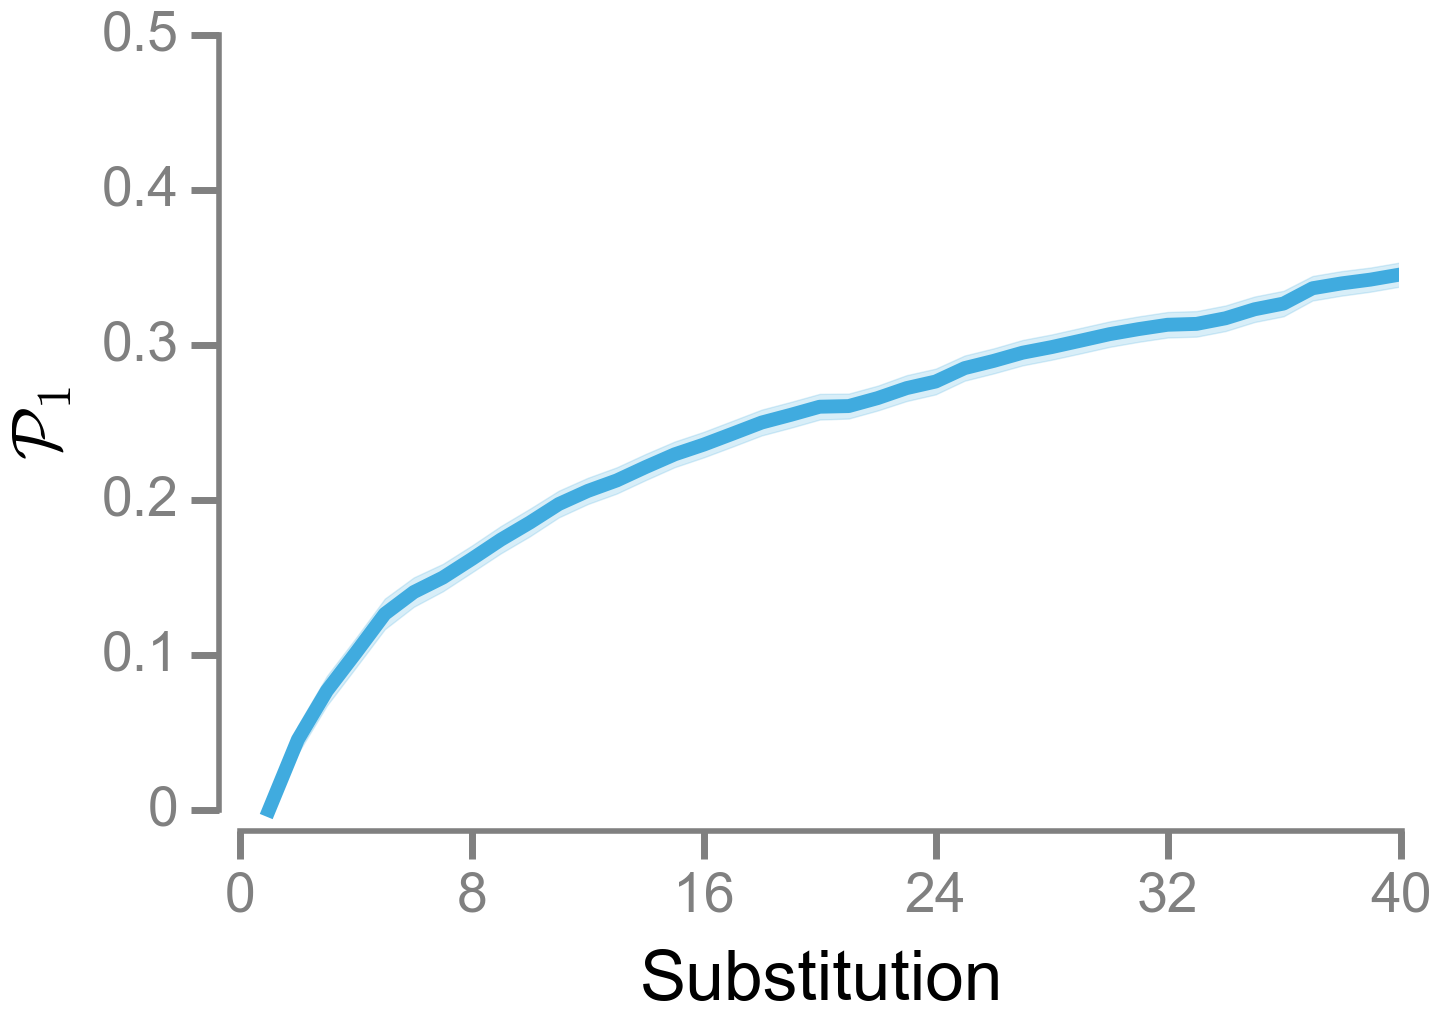

In [15]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

err0= 1.96*p1.std()/np.sqrt(len(p1))
plt.errorbar(x, p1.mean(), linewidth=10, clip_on=False, color='#40ABDF', zorder=1)
ax.fill_between(x, p1.mean() - err0, p1.mean() + err0, alpha=.2, color='#40ABDF', zorder=1)


plt.tick_params(axis='x', which='both', bottom='on', top='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'$\mathcal{P}_1$', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0, 0.5, 6), [ 0,  0.1,  0.2,  0.3,  0.4,  0.5])
#plt.yticks(np.linspace(0, 1, 6), [ 0 ,  0.2,  0.4,  0.6,  0.8,  1 ])
plt.xticks([  0.,   8.,  16.,  24.,  32.,  40.06], [  0,   8,  16,  24,  32,  40])
plt.ylim(0)
plt.xlim(0, 40.1)
rect = patches.Rectangle((40,0.1),1,0.4,linewidth=1,edgecolor='none',facecolor='white', zorder=5, clip_on=False)
# Add the patch to the Axes
ax.add_patch(rect)
plt.show()

## Table S1

#### GC content

In [16]:
def get_GC(seq):
    G = seq.count('G')
    C = seq.count('C')
    A = seq.count('A')
    U = seq.count('U')
    return (G + C)/float(A + U + G + C)

In [17]:
GC_content = []
for i in stat_12.values():
    GC_content.append(get_GC(i['ancestor']))

In [18]:
np.mean(GC_content), np.std(GC_content)

(0.51781999999999995, 0.047405143180882806)

#### Hamming distance form reference sequence

In [19]:
ham = []
for i in stat_12.values():
    ham.append(RNASeq.get_hamdist(i['ancestor'], i['ref_seq']))

In [20]:
np.mean(ham), np.std(ham)

(55.942999999999998, 5.0899657169768835)

#### MFE

In [21]:
mfe = []
for i in stat_12.values():
    mfe.append(RNASeq(i['ancestor']).mfe)

In [22]:
np.mean(mfe), np.std(mfe)

(-24.981779987812043, 6.0157063613976325)

#### number of base pairs

In [24]:
bp_n = []
for i in stat_12.values():
    bp_n.append(RNASeq(i['ancestor']).bp)
np.mean(bp_n), np.std(bp_n)

(25.628, 3.9879338008547731)

#### base-pair distance from the reference

In [25]:
bp_d = []
for i in stat_12.values():
    bp_d.append(RNASeq(i['ancestor']).get_bp_distance(RNASeq(i['ref_seq'])))
np.mean(bp_d), np.std(bp_d)

(11.242000000000001, 1.0997436064828929)

#### Pair-wise base-pair distance

In [26]:
anc = []
for i in stat_12.values():
    anc.append(RNASeq(i['ancestor']))
pairs = list(combinations(anc,2))
anc_bp_d = [i[0].get_bp_distance(i[1]) for i in pairs]
np.mean(anc_bp_d), np.std(anc_bp_d)

(50.929825825825823, 5.7951331371911952)

#### Proportion of inviable mutations

In [27]:
def proto_get_inviable_neighbors(seq, ref, alpha=12):
    """Get inviable sequences that are a single mutation away from a
    sequence.

    Parameters
    ----------
    seq : str
        Sequence

    Returns
    -------
    int
        Number of inviable neighbors.
    """
    nei = RNASeq.get_neighbors(seq)
    ref = RNASeq(ref)
    inviable = 0
    count = 0
    for site, nucl in nei:
        count += 1
        mut = RNASeq(RNASeq.mutate(seq, site, nucl))
        if not (mut.bp > alpha and mut.get_bp_distance(ref) <= alpha):
            inviable += 1
    return inviable/float(count)

In [28]:
prop_inv = []
for i in stat_12.values():
    prop_inv.append(proto_get_inviable_neighbors(i['ancestor'], i['ref_seq']))
np.mean(prop_inv), np.std(prop_inv)

(0.58431999999999995, 0.12053078832121415)

## Table S2

In [138]:
norm = %R qt(.975, 38)

### Single (i = 1)

In [139]:
y = np.array(single_m.mean())
x = np.arange(1, 41, 1)

In [140]:
%%R -i x -i y
mel = nls(y ~ a * (x - 1)^b, start=list(a=.1, b=.1))
summary(mel)


Formula: y ~ a * (x - 1)^b

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a 0.094119   0.001572   59.89   <2e-16 ***
b 1.374707   0.004883  281.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06228 on 38 degrees of freedom

Number of iterations to convergence: 8 
Achieved convergence tolerance: 7.046e-06



$a$ 95% CI and $b$ 95% CI

In [141]:
0.001572*norm[0], 0.004883*norm[0]

(0.0031823476256696158, 0.0098851167023821466)

In [142]:
yy = np.array([0.094119*(i - 1)**1.374707 for i in x])

In [143]:
%%R -i y -i yy
model = lm(yy ~ y)
summary(model)$r.squared 

[1] 0.9998149


### Double (i = 2)

In [189]:
y = np.array(double_m.mean())[1:]
x = np.arange(2, 41, 1)

In [190]:
%%R -i x -i y
mel = nls(y ~ a * (x - 2)^b, start=list(a=.1, b=.1))
summary(mel)


Formula: y ~ a * (x - 2)^b

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a 0.024038   0.001048   22.94   <2e-16 ***
b 1.802102   0.012671  142.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1376 on 37 degrees of freedom

Number of iterations to convergence: 11 
Achieved convergence tolerance: 2.262e-08



$a$ 95% CI and $b$ 95% CI

In [146]:
0.001048*norm[0], 0.012671*norm[0]

(0.0021215650837797442, 0.025651098450928562)

In [191]:
yy = np.array([0.024038*(i - 2)**1.802102 for i in x])

In [192]:
%%R -i y -i yy
model = lm(yy ~ y)
summary(model)$r.squared 

[1] 0.9993388


### Triple (i = 3)

In [193]:
y = np.array(triple_m.mean())[2:]
x = np.arange(3, 41, 1)

In [194]:
%%R -i x -i y
mel = nls(y ~ a * (x - 3)^b, start=list(a=.1, b=.1))
summary(mel)


Formula: y ~ a * (x - 3)^b

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 0.0035887  0.0002194   16.35   <2e-16 ***
b 2.4191925  0.0176877  136.77   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1768 on 36 degrees of freedom

Number of iterations to convergence: 15 
Achieved convergence tolerance: 4.88e-08



$a$ 95% CI and $b$ 95% CI

In [151]:
0.0002194*norm[0], 0.0176877*norm[0]

(0.00044415207956228608, 0.035806876653025739)

In [195]:
yy = np.array([0.0035887*(i - 3)**2.4191925 for i in x])

In [196]:
%%R -i y -i yy
model = lm(yy ~ y)
summary(model)$r.squared 

[1] 0.9993509


## Table S3

### Fitting $a(x - i)^{b}$ to $\alpha = 4$ sims

In [50]:
norm = %R qt(.975, 38)

### Single (i = 1)

In [19]:
y = np.array(single_4.mean())
x = np.arange(1, 41, 1)

In [137]:
%%R -i x -i y
mel = nls(y ~ a * (x - 1)^b, start=list(a=.1, b=.1))
summary(mel)


Formula: y ~ a * (x - 1)^b

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a 0.075308   0.001282   58.76   <2e-16 ***
b 1.413516   0.004969  284.47   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05671 on 38 degrees of freedom

Number of iterations to convergence: 9 
Achieved convergence tolerance: 9.542e-07



$a$ 95% CI and $b$ 95% CI

In [51]:
0.001282*norm[0], 0.004969*norm[0]

(0.0025952733181351445, 0.010059214600478577)

In [52]:
yy = np.array([0.075308*(i - 1)**1.413516 for i in x])

In [53]:
%%R -i y -i yy
model = lm(yy ~ y)
summary(model)$r.squared 

[1] 0.9998194


### Double (i = 2)

In [154]:
y = np.array(double_4.mean())[1:]
x = np.arange(2, 41, 1)

In [155]:
%%R -i x -i y
mel = nls(y ~ a * (x - 2)^b, start=list(a=.1, b=.1))
summary(mel)


Formula: y ~ a * (x - 2)^b

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 0.0227844  0.0006313   36.09   <2e-16 ***
b 1.7855499  0.0080577  221.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07891 on 37 degrees of freedom

Number of iterations to convergence: 11 
Achieved convergence tolerance: 3.643e-07



$a$ 95% CI and $b$ 95% CI

In [62]:
0.0006313*norm[0], 0.0080577*norm[0]

(0.0012780000356776263, 0.016311960854553473)

In [156]:
yy = np.array([0.0227844*(i - 2)**1.7855499 for i in x])

In [157]:
%%R -i y -i yy
model = lm(yy ~ y)
summary(model)$r.squared 

[1] 0.9997256


### Triple (i = 3)

In [158]:
y = np.array(triple_4.mean())[2:]
x = np.arange(3, 41, 1)

In [159]:
%%R -i x -i y
mel = nls(y ~ a * (x - 3)^b, start=list(a=.1, b=.1))
summary(mel)


Formula: y ~ a * (x - 3)^b

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 0.0044719  0.0002013   22.22   <2e-16 ***
b 2.3500208  0.0130332  180.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.131 on 36 degrees of freedom

Number of iterations to convergence: 15 
Achieved convergence tolerance: 1.617e-07



$a$ 95% CI and $b$ 95% CI

In [83]:
0.0002013*norm[0], 0.0130332*norm[0]

(0.0004075105451954794, 0.026384334017097479)

In [160]:
yy = np.array([0.0044719*(i - 3)**2.3500208 for i in x])

In [161]:
%%R -i y -i yy
model = lm(yy ~ y)
summary(model)$r.squared 

[1] 0.9996234


### Fitting $a(x - i)^{b}$ to $\alpha = 8$ sims 

In [86]:
norm = %R qt(.975, 38)

### Single (i = 1)

In [21]:
y = np.array(single_8.mean())
x = np.arange(1, 41, 1)

In [22]:
%%R -i x -i y
mel = nls(y ~ a * (x - 1)^b, start=list(a=.1, b=.1))
summary(mel)


Formula: y ~ a * (x - 1)^b

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a 0.097243   0.001387    70.1   <2e-16 ***
b 1.347027   0.004176   322.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05082 on 38 degrees of freedom

Number of iterations to convergence: 9 
Achieved convergence tolerance: 2.208e-06



$a$ 95% CI and $b$ 95% CI

In [89]:
0.001387*norm[0], 0.004176*norm[0]

(0.0028078347053459014, 0.0084538700284963846)

In [90]:
yy = np.array([0.097243*(i - 1)**1.347027 for i in x])

In [91]:
%%R -i y -i yy
model = lm(yy ~ y)
summary(model)$r.squared 

[1] 0.999867


### Double (i = 2)

In [164]:
y = np.array(double_8.mean())[1:]
x = np.arange(2, 41, 1)

In [165]:
%%R -i x -i y
mel = nls(y ~ a * (x - 2)^b, start=list(a=.1, b=.1))
summary(mel)


Formula: y ~ a * (x - 2)^b

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 0.0223716  0.0006376   35.09   <2e-16 ***
b 1.8083432  0.0082831  218.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08527 on 37 degrees of freedom

Number of iterations to convergence: 11 
Achieved convergence tolerance: 2.842e-07



$a$ 95% CI and $b$ 95% CI

In [95]:
0.0006376*norm[0], 0.0082831*norm[0]

(0.0012907537189102715, 0.016768259299099232)

In [166]:
yy = np.array([0.0223716*(i - 2)**1.8083432 for i in x])

In [167]:
%%R -i y -i yy
model = lm(yy ~ y)
summary(model)$r.squared 

[1] 0.9997196


### Triple (i = 3)

In [168]:
y = np.array(triple_8.mean())[2:]
x = np.arange(3, 41, 1)

In [169]:
%%R -i x -i y
mel = nls(y ~ a * (x - 3)^b, start=list(a=.1, b=.1))
summary(mel)


Formula: y ~ a * (x - 3)^b

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 0.0028118  0.0001064   26.42   <2e-16 ***
b 2.4945702  0.0109342  228.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1083 on 36 degrees of freedom

Number of iterations to convergence: 16 
Achieved convergence tolerance: 1.186e-07



$a$ 95% CI and $b$ 95% CI

In [101]:
0.0001064*norm[0], 0.0109342*norm[0]

(0.00021539553904023354, 0.022135130667046254)

In [170]:
yy = np.array([0.0028118*(i - 3)**2.4945702 for i in x])

In [171]:
%%R -i y -i yy
model = lm(yy ~ y)
summary(model)$r.squared 

[1] 0.9997715


### Fitting $a(x - i)^{b}$ to $\alpha = 16$ sims 

In [104]:
norm = %R qt(.975, 38)

### Single (i = 1)

In [23]:
y = np.array(single_16.mean())
x = np.arange(1, 41, 1)

In [24]:
%%R -i x -i y
mel = nls(y ~ a * (x - 1)^b, start=list(a=.1, b=.1))
summary(mel)


Formula: y ~ a * (x - 1)^b

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a 0.100416   0.001667   60.23   <2e-16 ***
b 1.353135   0.004859  278.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06215 on 38 degrees of freedom

Number of iterations to convergence: 9 
Achieved convergence tolerance: 5.992e-07



$a$ 95% CI and $b$ 95% CI

In [107]:
0.001667*norm[0], 0.004859*norm[0]

(0.0033746650712412531, 0.0098365312424482584)

In [108]:
yy = np.array([0.100416*(i - 1)**1.353135 for i in x])

In [109]:
%%R -i y -i yy
model = lm(yy ~ y)
summary(model)$r.squared 

[1] 0.9998076


### Double (i = 2)

In [173]:
y = np.array(double_16.mean())[1:]
x = np.arange(2, 41, 1)

In [174]:
%%R -i x -i y
mel = nls(y ~ a * (x - 2)^b, start=list(a=.1, b=.1))
summary(mel)


Formula: y ~ a * (x - 2)^b

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 0.0253849  0.0008265   30.71   <2e-16 ***
b 1.8017644  0.0094647  190.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1084 on 37 degrees of freedom

Number of iterations to convergence: 11 
Achieved convergence tolerance: 3.652e-09



$a$ 95% CI and $b$ 95% CI

In [112]:
0.0008265*norm[0], 0.0094647*norm[0]

(0.0016731617764732425, 0.019160283443177616)

In [175]:
yy = np.array([0.0253849*(i - 2)**1.8017644 for i in x])

In [176]:
%%R -i y -i yy
model = lm(yy ~ y)
summary(model)$r.squared 

[1] 0.9996376


### Triple (i = 3)

In [177]:
y = np.array(triple_16.mean())[2:]
x = np.arange(3, 41, 1)

In [178]:
%%R -i x -i y
mel = nls(y ~ a * (x - 3)^b, start=list(a=.1, b=.1))
summary(mel)


Formula: y ~ a * (x - 3)^b

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 0.0035376  0.0001884   18.78   <2e-16 ***
b 2.4545393  0.0153964  159.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1693 on 36 degrees of freedom

Number of iterations to convergence: 17 
Achieved convergence tolerance: 4.19e-07



$a$ 95% CI and $b$ 95% CI

In [117]:
0.0001884*norm[0], 0.0153964*norm[0]

(0.00038139586048101503, 0.031168382305254243)

In [179]:
yy = np.array([0.0035376*(i - 3)**2.4545393 for i in x])

In [180]:
%%R -i y -i yy
model = lm(yy ~ y)
summary(model)$r.squared 

[1] 0.9995296


### Fitting $a(x - i)^{b}$ to $\alpha = 20$ sims 

In [120]:
norm = %R qt(.975, 38)

### Single (i = 1)

In [121]:
y = np.array(single_20.mean())
x = np.arange(1, 41, 1)

In [122]:
%%R -i x -i y
mel = nls(y ~ a * (x - 1)^b, start=list(a=.1, b=.1))
summary(mel)


Formula: y ~ a * (x - 1)^b

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a 0.130088   0.001891   68.79   <2e-16 ***
b 1.309267   0.004262  307.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0623 on 38 degrees of freedom

Number of iterations to convergence: 9 
Achieved convergence tolerance: 6.175e-08



$a$ 95% CI and $b$ 95% CI

In [123]:
0.001891*norm[0], 0.004262*norm[0]

(0.0038281293639575342, 0.0086279679265928132)

In [124]:
yy = np.array([0.130088*(i - 1)**1.309267 for i in x])

In [125]:
%%R -i y -i yy
model = lm(yy ~ y)
summary(model)$r.squared 

[1] 0.9998538


### Double (i = 2)

In [181]:
y = np.array(double_20.mean())[1:]
x = np.arange(2, 41, 1)

In [182]:
%%R -i x -i y
mel = nls(y ~ a * (x - 2)^b, start=list(a=.1, b=.1))
summary(mel)


Formula: y ~ a * (x - 2)^b

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 0.0272567  0.0007084   38.48   <2e-16 ***
b 1.7906127  0.0075569  236.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08988 on 37 degrees of freedom

Number of iterations to convergence: 11 
Achieved convergence tolerance: 1.293e-08



$a$ 95% CI and $b$ 95% CI

In [128]:
0.0007084*norm[0], 0.0075569*norm[0]

(0.0014340808257152391, 0.015298144257266361)

In [183]:
yy = np.array([0.0272567*(i - 2)**1.7906127 for i in x])

In [184]:
%%R -i y -i yy
model = lm(yy ~ y)
summary(model)$r.squared 

[1] 0.9997643


### Triple (i = 3)

In [185]:
y = np.array(triple_20.mean())[2:]
x = np.arange(3, 41, 1)

In [186]:
%%R -i x -i y
mel = nls(y ~ a * (x - 3)^b, start=list(a=.1, b=.1))
summary(mel)


Formula: y ~ a * (x - 3)^b

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 0.0021489  0.0001283   16.75   <2e-16 ***
b 2.6136130  0.0172225  151.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1893 on 36 degrees of freedom

Number of iterations to convergence: 17 
Achieved convergence tolerance: 7.715e-07



$a$ 95% CI and $b$ 95% CI

In [133]:
0.0001283*norm[0], 0.0172225*norm[0]

(0.00025972977122990567, 0.034865128487973893)

In [187]:
yy = np.array([0.0021489*(i - 3)**2.6136130 for i in x])

In [188]:
%%R -i y -i yy
model = lm(yy ~ y)
summary(model)$r.squared 

[1] 0.9995475
